<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/Pr1_VisualizacionDatos_AnaAlonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Práctica csv de ventas**

Para la resolución de la práctica se deben seguir las siguientes instrucciones:

Se debe utilizar lalibrería de **MatplotLib**.

Y seguir los siguientes **4 pasos** para cada pregunta:

1) Pensar qué se va a pintar.

2) Pensar qué es necesario. Limpiar los datos.

3) Pintar la gráfica.

4) Explicar lo que se ha pintado (2 líneas).

In [8]:
pip install matplotlib

In [ ]:
pip install seaborn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size
import seaborn as sns

Dado el siguiente Dataset, se procede a explicar todas las variables que contiene.

In [10]:
# Lectura de la base de datos
filename = 'eu_sample_2.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.shape)
data.head(10)

(5399, 11)


,YR,PRD,MONTH,DATE,SCENRO,MU,BU,SCTR,CNTRY,SUBBRAND,AMT
0,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,20969.017914
1,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,141.987137
2,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1058.399611
3,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,30813.110677
4,2017,2.0,1,2017-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,2254.041831
5,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1233,26737.962565
6,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_1259,249.610787
7,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_24,1403.038330
8,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_837,45561.428783
9,2018,2.0,1,2018-01-01,Actual,CE FOBO,FOBO BU,Europe,Albania,L3_956,3261.107550


La definición de las variables es:

Year: año.

Periodo (PRD) se ignora para esta práctica.

Month: mes.

Date: día 1 del mes que indica.

Scenario (SCENRO): no aporta información, ya que siempre tiene el valor ACTUAL.

Market Unit (MU).

Bussines Unit (BU).

Sector (SCTR) en este dataset siempre es Europe.

CNTRY = Country

SUBBRAND: producto que tuvo ese volumen.

AMT: el volumen de venta (OBJETIVO).

Procedemos a estudiar y limpiar los datos.

Eliminamos los Nan (que en este caso no hay) y los datos de AMT < 0, ya que no puede haber un volumen de ventas negativo.

In [11]:
data = data.dropna()

condition = data['AMT'] < 0

data = data[~condition]

data.shape

(5367, 11)

## 1. ¿Cuál es la distribución de volumen entre todas las BU y entre todas las MU? (por separado).

<ipython-input-12-f07f600fff55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  BU = data.groupby('BU').sum()


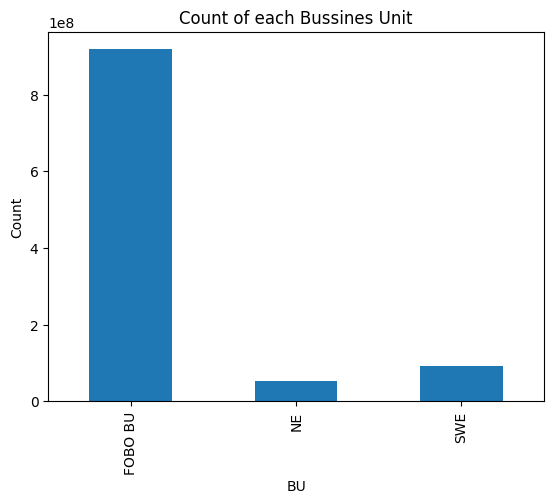

In [12]:
BU = data.groupby('BU').sum()

BU['AMT'].plot(kind='bar')
plt.xlabel('BU')
plt.ylabel('Count')
plt.title('Count of each Bussines Unit')
plt.show()

Podemos observar que la forma en la que se distribuye el volumen nos devuelve que FOBO BU tiene mucho más volumen que las otras dos. Procedemos a visualizar un pie chart que nos muestre los diferentes porcentajes de distribución.

He elegido un gráfico de barras debido a que son solo 3 variables y se ve con claridad cual de las 3 tiene mayor volumen. Sin embargo, esto no responde realmente a la pregunta, pues lo que pide es la distribución, por lo que procedemos a crear un gráfico de tarta donde nos mostrará cada uno de los porcentajes.

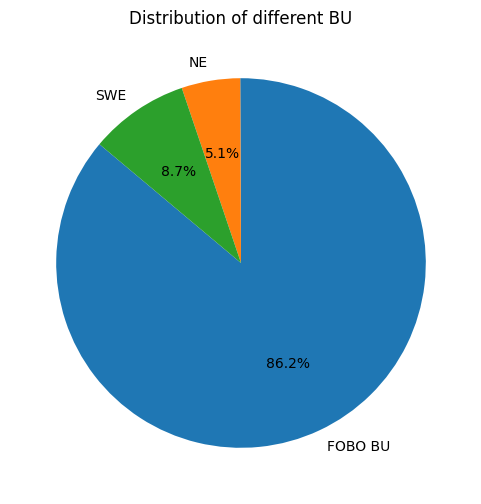

In [13]:
# Create a pie chart with labels and percentages

plt.figure(figsize=(6, 6))
plt.pie(BU['AMT'], labels=BU['AMT'].index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different BU')
plt.show()

Las cantidades de volumen entre las distintas BU, es decir, la distribución, es de 86.2% FOBO BU, 8.7% SWE y 5.1% NE.

In [14]:
BU['AMT']

BU
FOBO BU    9.183012e+08
NE         5.465446e+07
SWE        9.265429e+07
Name: AMT, dtype: float64

En el caso de las distintas MUs, tenemos 9 diferentes como podemos ver a continuación. Es por ello que usar un Pie Chart no nos serviría.

In [62]:
MU = data.groupby('MU', as_index=False).sum()
MU = MU.sort_values(by='AMT', ascending=False).reset_index()
MU1 = MU[0:4]



MU2 = MU[4:9]
AMT_otros = MU2["AMT"].values[0] + MU2["AMT"].values[1] + MU2["AMT"].values[2] + MU2["AMT"].values[3] + MU2["AMT"].values[4]
AMT_otros

# MU1.append(['0', '0', '0', AMT_otros])

new_row = {'MU':'Otros','YR':0, 'PRD':0, 'MONTH':5, 'AMT':AMT_otros}
MU = MU1.append(new_row, ignore_index=True)

MU = MU.sort_values(by='AMT', ascending=False).reset_index()

MU

<ipython-input-62-784bdaa5a88f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MU = data.groupby('MU', as_index=False).sum()
<ipython-input-62-784bdaa5a88f>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MU = MU1.append(new_row, ignore_index=True)


,level_0,index,MU,YR,PRD,MONTH,AMT
0,0,4.0,GBI FOBO,772702,2878.0,2495,4.171442e+08
1,1,6.0,NE FOBO,2449259,9172.0,7958,2.281415e+08
2,2,0.0,BCCA FOBO,1803646,6818.0,5924,1.473676e+08
3,4,NaN,Otros,0,0.0,5,1.473088e+08
4,3,2.0,CE FOBO,4047156,15493.0,13487,1.256480e+08


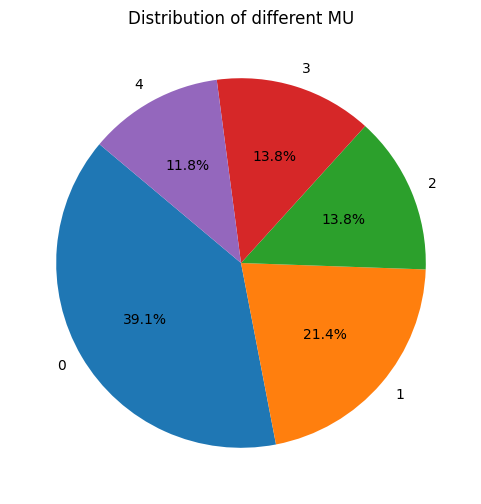

In [63]:
# Create a pie chart with labels and percentages

plt.figure(figsize=(6, 6))
plt.pie(MU['AMT'], labels=MU['AMT'].index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different MU')
plt.show()

Podemos observar que la distribución mostrada nos devuelve un 13.8% del volumen del total de datos. Es decir, este método no nos sirve del todo, debido a que no es el valor más bajo de la distribución el de 'otros'.


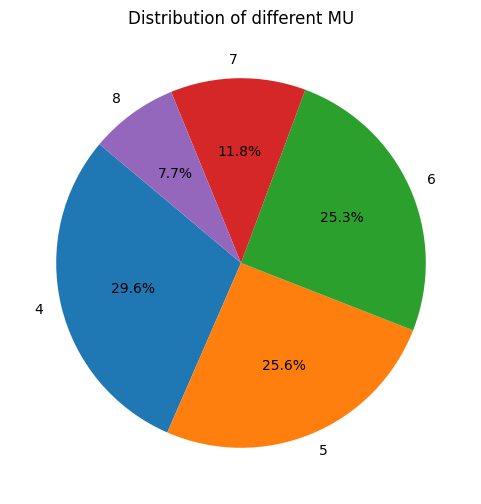

In [65]:
# Create a pie chart with labels and percentages

plt.figure(figsize=(6, 6))
plt.pie(MU2['AMT'], labels=MU2['AMT'].index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different MU')
plt.show()

Además, aquí observamos que las 5 MUs con menor volumen se distribuyen de esta manera. Aplicando los porcentajes de este último gráfico al porcentaje total que ocupan en el primero, podríamos sacar el porcentaje exacto de cada una de las MUs pertenecientes a 'otros'.

De más alto a más bajo serían los siguientes: 4.09%, 3.53%, 3.49%, 1.63% y 1.06%

No realizamos un gráfico de tarta con todas las MUs por separado debido a que no se debe realizar con más de 5 variables diferentes para que se vea adecuadamente.

###1.1 ¿Cuáles son las MU con más volumen?

<ipython-input-15-1681fabfd268>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MU = data.groupby('MU').sum()


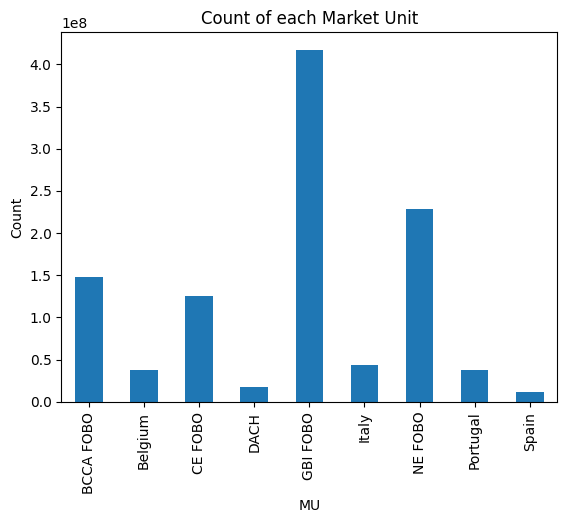

In [15]:
MU = data.groupby('MU').sum()

MU['AMT'].plot(kind='bar')
plt.xlabel('MU')
plt.ylabel('Count')
plt.title('Count of each Market Unit')
plt.show()

Tras graficar el bar chart con los volumenés de las diferentes MU's, podemos responder a la pregunta planteada.

Las MU's con más volumen son GBI FOBO, con mucha diferencia con el resto de MU's, seguida de NE FOBO.

Para sacar la distribución de volumen entre los MU's no hacemos el Pie Chart, ya que hay un número de categorías (MU's) distintos muy grande, hay 9 categorías diferentes.

He elegido usar la gráfica de barras ya que se ve claramente qué MUs tienen mayor volumen.

###1.2 En la BU de España, ¿cuál es el ranking de España dentro de su BU?

Antes de contestar a la pregunta plantada, comprobamos que España (como país) pertenece a una única BU. Y vemos que así es, concretamente en BU = SWE.

In [16]:
data_Spain = data.loc[data['CNTRY'] == 'Spain']

data_Spain_BU = data_Spain.groupby(data_Spain['BU']).count()

data_Spain_BU

,YR,PRD,MONTH,DATE,SCENRO,MU,SCTR,CNTRY,SUBBRAND,AMT
BU,,,,,,,,,,
SWE,304,304,304,304,304,304,304,304,304,304


<ipython-input-17-c6c790fd7b34>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SWE = data_SWE.groupby('CNTRY').sum()


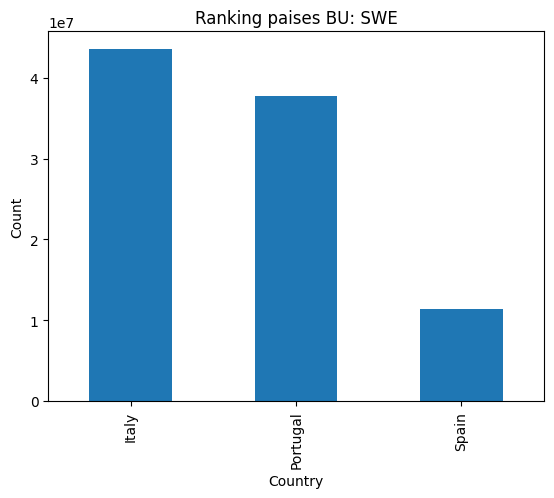

In [17]:
# Creamos un dataframe que contenga solo los registros que pertenecen a la BU SWE
data_SWE = data.loc[data['BU'] == 'SWE']

SWE = data_SWE.groupby('CNTRY').sum()
SWE['AMT'].plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Ranking paises BU: SWE')
plt.show()

Observamos que el bar chart nos devuelve que España es el tercero de tres paises que pertenecen a la BU SWE en cuanto a volumen de venta que tiene.

El primero es Italia y el segundo Portugal.

##3. Si tuvieses que mejorar las ventas de Europa, ¿en qué país te centrarías?

Primero creamos un dataframe nuevo agrupado por paises, sumamos sus valores y ordenamos según el valor del volumen de ventas (AMT), para centrarnos en dicha categoría.

In [18]:
data_country = data.groupby('CNTRY').sum()
data_country = data_country.sort_values(by='AMT', ascending=False).reset_index()
data_country

<ipython-input-18-19fcf3d2361d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_country = data.groupby('CNTRY').sum()


,CNTRY,YR,PRD,MONTH,AMT
0,Great Britain,433762,1618.0,1403,3.869928e+08
1,Netherlands,381309,1421.0,1232,7.553462e+07
2,Uzbekistan,230000,888.0,774,6.369489e+07
3,Italy,284466,1050.0,909,4.357727e+07
4,Norway,294557,1132.0,986,4.181579e+07
5,Sweden,274382,1019.0,883,4.164133e+07
6,Kazakhstan,234032,867.0,751,3.821910e+07
7,Portugal,373234,1370.0,1185,3.770476e+07
8,Belgium,193680,720.0,624,3.722837e+07
9,Serbia,306658,1132.0,980,3.186751e+07


In [29]:
data_country1 = data_country[0:18]

<ipython-input-30-e4ee152d8217>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = data_country1.pivot('CNTRY', 'AMT', 'AMT').fillna(0)


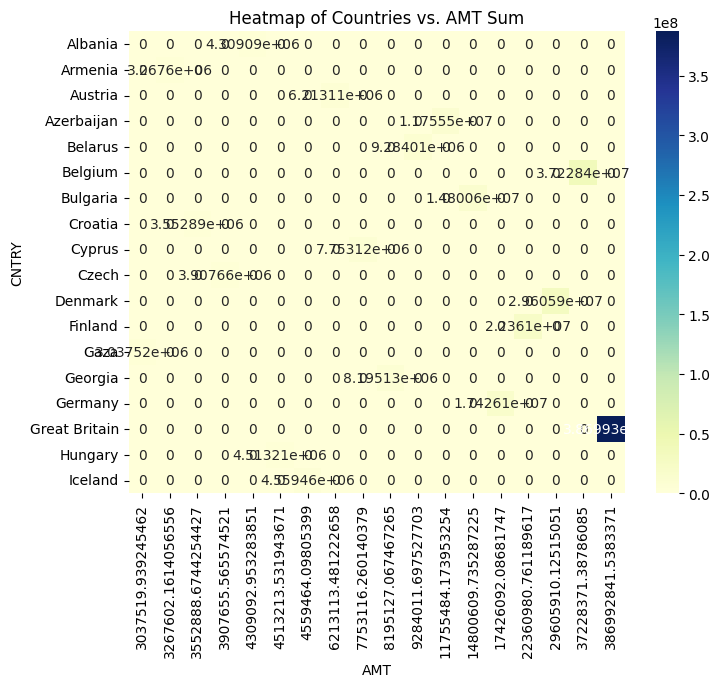

In [30]:
# Group by 'Category' and calculate the sum of 'Value' in each group
data_country = data.groupby('CNTRY')['AMT'].sum().reset_index()
data_country1 = data_country[0:18]
heatmap_data = data_country1.pivot('CNTRY', 'AMT', 'AMT').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar=True)
plt.title('Heatmap of Countries vs. AMT Sum')
plt.show()